## High Performance Income Prediction

Given *attributes for every individual*, we need to predict whether income of an individual would be high (above 50k) or low.

We will use tensorflow to make our predictions.

Data source: https://www.kaggle.com/datasets/uciml/adult-census-income

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

2025-05-01 08:24:52.703960: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('adult.csv')
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Preprocessing

In [4]:
df = data.copy()

#### Missing values

In [5]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [8]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [9]:
df['occupation'].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [11]:
df['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [12]:
df = df.replace('?', np.NaN)

In [13]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [14]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


#### Encoding

In [34]:
{column: len(df[column].unique()) for column in df.columns}

{'age': 73,
 'workclass': 9,
 'fnlwgt': 21648,
 'education': 16,
 'education.num': 16,
 'marital.status': 7,
 'occupation': 15,
 'relationship': 6,
 'race': 5,
 'sex': 2,
 'capital.gain': 119,
 'capital.loss': 92,
 'hours.per.week': 94,
 'native.country': 42,
 'income': 2}

<Axes: xlabel='education'>

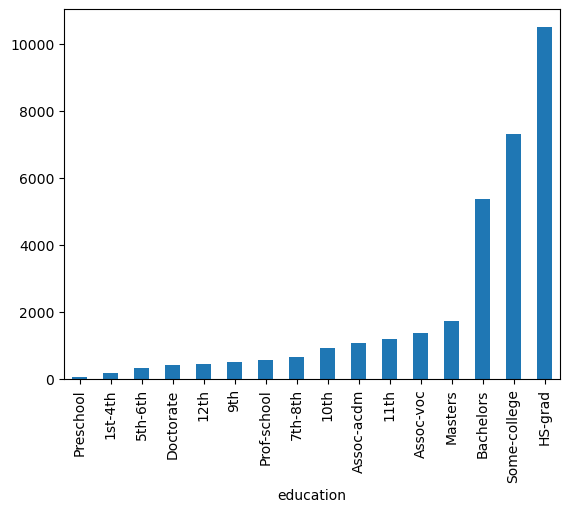

In [46]:
df.groupby('education')['education'].count().sort_values().plot(kind='bar')

<Axes: xlabel='education.num'>

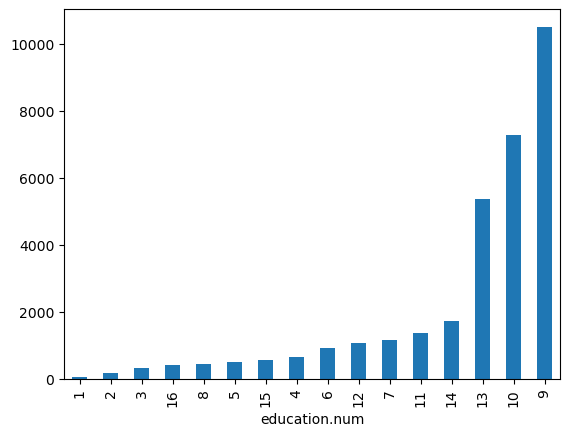

In [47]:
df.groupby('education.num')['education.num'].count().sort_values().plot(kind='bar')

In [61]:
(df.groupby('education.num')['education.num'].count().sort_values().values != df.groupby('education')['education'].count().sort_values().values).sum()

0

In [62]:
df.drop('education', axis=1, inplace=True)

In [66]:
categorical_features = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

In [68]:
{column: (df[column].unique()) for column in categorical_features}

{'workclass': array([nan, 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
        'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
       dtype=object),
 'marital.status': array(['Widowed', 'Divorced', 'Separated', 'Never-married',
        'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
       dtype=object),
 'occupation': array([nan, 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
        'Other-service', 'Adm-clerical', 'Craft-repair',
        'Transport-moving', 'Handlers-cleaners', 'Sales',
        'Farming-fishing', 'Tech-support', 'Protective-serv',
        'Armed-Forces', 'Priv-house-serv'], dtype=object),
 'relationship': array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
        'Husband', 'Wife'], dtype=object),
 'race': array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
        'Amer-Indian-Eskimo'], dtype=object),
 'sex': array(['Female', 'Male'], dtype=object),
 'native.country': array(['United-Sta

In [69]:
binary_features = ['sex']

nominal_features = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']

In [70]:
def binary_encode(df, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        df[column] = label_encoder.fit_transform(df[column])
    return df

In [71]:
def onehot_encode(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [72]:
df = binary_encode(df, binary_features)
df = onehot_encode(df, nominal_features)

In [73]:
df

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,0,4356,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,82,132870,9,0,0,4356,18,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,66,186061,10,0,0,4356,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,0,3900,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,10,0,0,3900,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,1,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,27,257302,12,0,0,0,38,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,40,154374,9,1,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,58,151910,9,0,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False


In [75]:
(df.dtypes =='object').sum()

1

In [76]:
y = df['income']
X = df.drop('income', axis=1)

In [77]:
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32561, dtype: object

In [78]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_mappings = {index: label for index, label in enumerate(label_encoder.classes_)}

In [79]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [80]:
y_mappings

{0: '<=50K', 1: '>50K'}

In [81]:
# Scale X
scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [82]:
X

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,1.000000,0.043987,0.533333,0.0,0.0,1.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.890411,0.081896,0.533333,0.0,0.0,1.000000,0.173469,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.671233,0.118021,0.600000,0.0,0.0,1.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.506849,0.086982,0.200000,0.0,0.0,0.895317,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.328767,0.171404,0.600000,0.0,0.0,0.895317,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,0.202298,0.600000,1.0,0.0,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,0.136986,0.166404,0.733333,0.0,0.0,0.000000,0.377551,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,0.315068,0.096500,0.533333,1.0,0.0,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,0.561644,0.094827,0.533333,0.0,0.0,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Training

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [88]:
inputs = tf.keras.layers.Input(shape=(88, ))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

metrics = [
    tf.keras.metrics.BinaryAccuracy(name='acc'),
    tf.keras.metrics.AUC(name='auc')
]

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=metrics
)

batch_size = 32
epochs=35

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs
)

Epoch 1/35
652/652 [==============================] - 4s 4ms/step - loss: 0.4118 - acc: 0.8087 - auc: 0.8291 - val_loss: 0.3588 - val_acc: 0.8332 - val_auc: 0.8752
Epoch 2/35
652/652 [==============================] - 3s 5ms/step - loss: 0.3458 - acc: 0.8379 - auc: 0.8891 - val_loss: 0.3392 - val_acc: 0.8413 - val_auc: 0.8898
Epoch 3/35
652/652 [==============================] - 2s 3ms/step - loss: 0.3296 - acc: 0.8429 - auc: 0.8998 - val_loss: 0.3314 - val_acc: 0.8443 - val_auc: 0.8957
Epoch 4/35
652/652 [==============================] - 2s 3ms/step - loss: 0.3220 - acc: 0.8494 - auc: 0.9046 - val_loss: 0.3261 - val_acc: 0.8497 - val_auc: 0.8985
Epoch 5/35
652/652 [==============================] - 3s 5ms/step - loss: 0.3170 - acc: 0.8492 - auc: 0.9076 - val_loss: 0.3279 - val_acc: 0.8459 - val_auc: 0.9000
Epoch 6/35
652/652 [==============================] - 3s 5ms/step - loss: 0.3155 - acc: 0.8506 - auc: 0.9085 - val_loss: 0.3410 - val_acc: 0.8342 - val_auc: 0.9004
Epoch 7/35
652/6

### Results

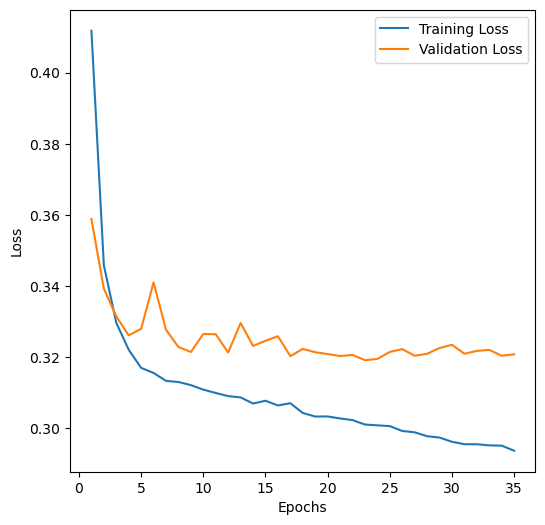

In [89]:
plt.figure(figsize=(6,6))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [90]:
np.argmin(val_loss)

22

In [91]:
model.evaluate(X_test, y_test)

204/204 [==============================] - 1s 6ms/step - loss: 0.3284 - acc: 0.8480 - auc: 0.9051


[0.3283681571483612, 0.8479962944984436, 0.9050803780555725]

In [93]:
y.sum()/len(y)

0.2408095574460244